<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and regression trees (CARTs: Classification and Regression Trees by Breiman et al - 1984) Non-parametric learner

_Instructor: Aymeric Flaisler_

---
### Learning Objectives
- Gain intuition for what decision trees do through example.
- Describe the difference between classification and regression trees and how to interpret these models
- Learn how decision trees are fit via pseudocode.
- Understand the concept of purity.
- Learn the equations for entropy, gini impurity, and how they relate to the misclassification error.
- Learn how to visualize the nodes of a decision tree with python.
- Learn some basic strategies to prevent overfitting when using decision trees.
- Understand the advantages and disadvantages of using CARTs.

<a id='intro'></a>

## Introduction to CARTs

---

Decision trees are a widely popular and powerful machine learning technique for both classification and regression problems.

To perform classification or regression, decision trees make sequential, hierarchical decisions about the outcome variable based on the predictor data.

---

[Classification CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[Regression CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

[Decision tree user guide](http://scikit-learn.org/stable/modules/tree.html)



# Here is Some (Categorical) Data:

![title](./img/data_dt_cat.png)

# How Can We Make Decisions ?

![title](./img/dt_cat_bad_code_0.png)

# Why is this HORRIBLE ?

![title](img/dt_cat_bad_code_1.png)

# Now with a Decision Tree

![title](img/dt_cat_1.png)

# Now with a Decision Tree

![title](img/dt_cat_2.png)

# Now with a Decision Tree

![title](img/dt_cat_3.png)

## The goal of a decision tree is to obtain pure subsets 

=> To achieve that, it will split the data using all the features available until none of them is left. 

Checkout: what does that tells us about the bias-variance of such models?

## Let's have a look at how it works with sklean

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.datasets as datasets
import pandas as pd

b = datasets.load_iris()
X, Y = b['data'], b['target']

In [ ]:
# criterion: splitting decision function (discussed later), can be 'gini' or 'entropy'
# max_depth: the maximum number of hierarchical decision nodes (how "deep" the tree is built)
#
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=5)

classifier.fit(X, Y)

Y_pred = classifier.predict(X)

In [ ]:
# decision trees can give us feature importances. 
# the higher the number the more important
# the predictor was to deciding splits at nodes.
# "The importance of a feature is computed as the (normalized) total reduction of the
# criterion brought by that feature."

feature_importances = classifier.feature_importances_

# Using a dataframe: 

df_fi = pd.DataFrame({
    'feature': b.feature_names,
    'importance': classifier.feature_importances_
})

df_fi.sort_values('importance', ascending=False, inplace=True)
df_fi

<a id='properties'></a>
## Properties of decision trees

---

Decision tree models are **hierarchical** and **non-parametric**.

**Hierarchical** means that the model is definied by a **sequence of questions** which yield a class label or value when applied to any observation. Once trained, **the model behaves like a recipe**, a series of **"if this then that" conditions** that yields a specific result for our input data.

[**Non-parametric** methods](http://www.statisticshowto.com/parametric-and-non-parametric-data/) stand in contrast to models like logistic regression or ordinary least squares regression. There are **no underlying assumptions about the distribution of the data or the errors**. Non-parametric models essentially start with **no _assumed_ parameters about the data** and construct them based on the observed data.

# Terminology A tree consists of:

- Node
- Branches
- Root
- Leaves


![title](img/dt_term_0.png)

<a id='dag'></a>
## Directed Acyclic Graphs (DAG)

---

CART models are in fact a special case of [Directed Acyclic Graphs (DAG).](http://www.statisticshowto.com/directed-acyclic-graph/) 

DAGs have **nodes** and **edges**. In the golf example above, the nodes represent the decision points about the output variable given the predictors, and the edges are the "paths" between nodes that represent answers to the questions.

The **acyclic** part of DAGs means that the edges do not cycle back on themselves.


### General DAG example

---
- The top node is called the **root node**. It has 0 incoming edges, and 2+ outgoing edges. 
- Internal nodes test a condition on a specific feature. They have 1 incoming edge, and 2+ outgoing edges. 
- A **leaf node** contains a class label (or regression value). It has 1 incoming edge and 0 outgoing edges.

![DAG example](https://upload.wikimedia.org/wikipedia/commons/0/08/Directed_acyclic_graph.png)

## We have seen what a decision Tree for categorical data is.

## - Let now see what a Regression Tree is (Numerical Data)

# Regression Trees (Numerical data)

![title](./img/dt_reg_0.png)


# Predictions and Actual Values (Depth = 1)

![title](img/dt_reg_1.png)

# Predictions and Actual Values (Depth = 2)

![title](img/dt_reg_2.png)

# We now have seen decision Trees with both categorical and numerical data.

<a id='building'></a>
## Let's see how a decision tree is built

---

Building decision trees requires algorithms capable of **determining an optimal choice at each node**. 

One such algorithm is [**Hunt's algorithm**](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html). This is a **greedy, recursive algorithm** that leads to a local optimum:

- [**Greedy:**](https://en.wikipedia.org/wiki/Greedy_algorithm) the algorithm makes the most optimal decision it can at each step.
- [**Recursive:**](https://en.wikipedia.org/wiki/Recursion) the algorithm splits task into subtasks and solves each the same way.
- [**Local optimum:**](https://en.wikipedia.org/wiki/Local_optimum) the algorithm finds a solution just for the given neighborhood of points.

The algorithm works by recursively partitioning records **into smaller and smaller** subsets. The partitioning decision is made at each node according to a metric called **purity.** A node is said to be 100% pure when all of its records belong to a single class (or have the same value).

<a id='pseudo'></a>
### Pseudocode classification decision tree algorithm

---
```
function BuildTree:
    if every item in the dataset is in the same class or there is no feature left to split the data:
        return a leaf node with the class label
    else:
        find the best feature and value to split the data
        split the dataset
        create a node
        for each split:
            call BuildTree and add the result as a child of the node
        return node
```

## Let's build a decision for categorical data

# Building a Decision Tree: Splits

![title](img/dt_build_0.png)

# Which test (split) is the most informative? 

![title](img/dt_build_1.png)

<a id='purity'></a>
## Optimization and "purity"

---

Recall from the algorithm above we iteratively create test conditions to split the data. 

In a binary classification task, a maximum impurity partition is given by the distribution (classification):

### $$ p(0|t) = p(1|t) = 0.5 $$

where both classes are equally present in the partition distribution $t$.

Maximum purity, on the other hand, is when only one class is present, i.e: 

### $$ p(0|t) = 1 – p(1|t) = 1 $$

# Entropy: a Common Way to Measure Impurity
<a id='obj'></a>
### Purity objective function

To achieve maximum purity we need an **objective function** to optimize. 

For example, let 

### $$p(i|t)$$ 

be the probability of **`class i`** in the data at **`node t`** (e.g., the fraction of records labeled **`i`** at node **`t`**) 

We then define an impurity function that will smoothly vary **between the two extreme cases of minimum impurity** (one class or the other only) and the maximum impurity case cas as an equal mix.
- Entropy = $\sum_{i} -p_i . log_2 (p_i)$ 

$p_i$ is the probability of class i in the set<br>



![title](img/dt_build_2.png)

# Split time

## - What is an ideal split?




##  > One that maximize the information about the prediction

![title](img/dt_build_6.png)



# Information Gain 
<br>


## - Tells us how important a given attribute of the features vector is by looking at the `impurity` before & after the split 
=> Therefore it depends on the class distribution over the nodes (before and after the split).

## - We can make this comparison using what is called the gain:


### Information Gain = entropy(parent) – [mean(entropy(children))]

# Splitting (test on X): exercise


![title](./img/dt_build_3_empty.png)

![title](./img/dt_build_7.png)

# Splitting (test on X):


![title](img/dt_build_3.png)

![title](./img/dt_build_7.png)

# Splitting (test on Z):


![title](img/dt_build_4.png)

![title](./img/dt_build_7.png)

# Splitting (test on Y):


![title](img/dt_build_5.png)

![title](./img/dt_build_7.png)

<a id='ent-gini'></a>
## Common purity functions (classification)

---

### $$ \text{Entropy} = - \sum_{i=1}^{classes} p(i\;|\;t) \;log_2 \; p(i\;|\;t) $$

### $$ \text{Gini} = \sum_{i=1}^{classes} p(i\;|\;t)(1 -p(i\;|\;t)) = 1 - \sum_{i=1}^{classes} p(i\;|\;t)^2 $$

The Gini inpurity is primarily used in the CART algorithm, but both Gini and Entropy are available in sklearn's classification and decision tree models.

<a id='impurity-gain'></a>
![purity functions](./img/measures.png)

---

Impurity measures on their own they are not enough to tell us how a split will do. We need to look at impurity **before & after** the split. We can make this comparison using what is called the **gain**: 

## $$ \Delta = I(\text{parent}) - \sum_{\text{children}}\frac{N_j}{N}I(\text{child}_j) $$

Where $I$ is the impurity measure, $N_j$ denotes the number of records at child node $j$, and $N$ denotes the number of records at the parent node. When $I$ is the [**entropy function**](https://en.wikipedia.org/wiki/Binary_entropy_function), this quantity is called the [**information gain**](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees).

**[Nice example of how misclassification error can break branching.](http://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html)**

<a id='overfit'></a>
## Addressing overfitting

---

A stopping criterion determines when to no longer construct further nodes. 

We can stop when all records belong to the same class, or when all records have the same attributes. This *maximizes variance at the expense of bias*, leading to overfitting. 

**Setting a maximum depth:**

A simple way to prevent overfitting is to set a **hard limit on the "depth"** of the decision tree.

**Minimum observations to make a split:**

An alternative to maximum depth (and can be used at the same time), is to specify the **minimum number of datapoints required to make a split** at a node.


<a id='advantages'></a>
## CART advantages
---

- **Simple to understand and interpret**. People are able to understand decision tree models after a brief explanation.
- Requires little data preparation (the data do not require standardisation). 
- Able to handle both **numerical and categorical data**. 
- Uses a **white box** model.
- **Performs well with large datasets**. Large amounts of data can be analyzed using standard computing resources in reasonable time.
- Once trained can be implemented on hardware and has **extremely fast execution**.

<a id='disadvantages'></a>
## CART disadvantages
---

- Locally-optimal.
    - Practical decision-tree learning algorithms are based on heuristics such as the **greedy algorithm** where locally-optimal decisions are made at each node. 
    - Such algorithms cannot guarantee to return the **globally-optimal decision tree**.
- Overfitting.
    - Decision-tree learners can create **over-complex trees** that do not generalize well from the training data.
- Decision tree learners create **biased trees if some classes dominate**. It is therefore recommended to **balance the dataset prior to fitting** with the decision tree.

## Questions ?


## In pairs, answer to the following questions:
In Decision Trees:
- what do we call impurity?
- what is the difference with information gain?
- limiting the depth or the min number of samples impact the bias, the variance or none of them? Explain with your own words
    

## Code along: Let's visualise regression trees

**Library Note**

In order to run the below on your machine you may have to install or update a few new packages.

**Pydotplus**
```
pip install pydotplus
```

_and its dependency_

**Graphviz**
```
brew install graphviz
```

In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# We will make some data for these functions of 100 points of x from 0.1 to 10:
# 
# 1. The general log function for x
# 2. The sin function
# 3. The exponential function
# 4. The x**2 function
#
def make_data(points=100):
    x = np.linspace(0.1, 10, points)
    
    data = {
        'x':x,
        'ygenlog':stats.genlogistic.pdf(x, 20)*500 + np.random.normal(0, 2, size=points),
        'ysin':np.sin(x)*20 + np.random.normal(0, 2, size=points),
        'yexp':np.exp(x/1.3) + np.random.normal(0, 2, size=points),
        'ysq':(x-5)**2 + np.random.normal(0, 1, size=points)
    }

    return data

# The data is put into a dictionary for convenience:
d = make_data()
x = d['x']

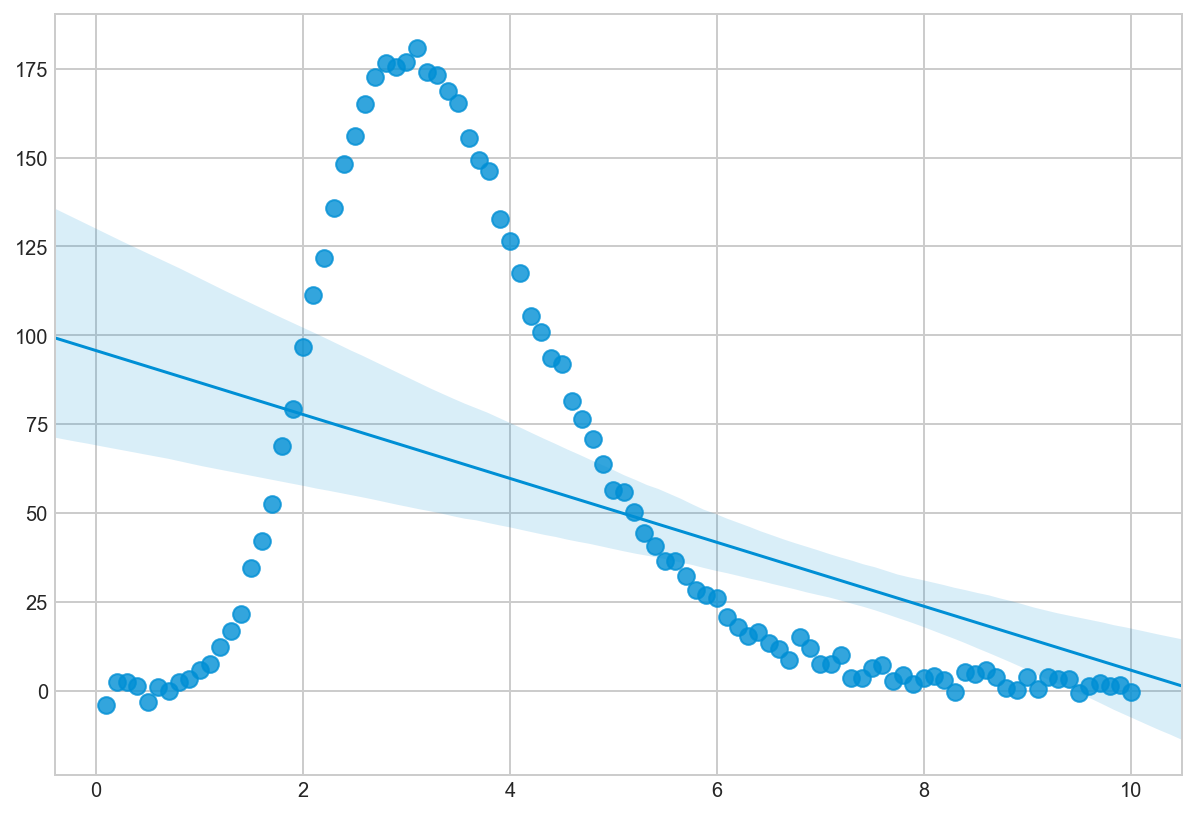

In [6]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ygenlog'], scatter_kws={'s':70});

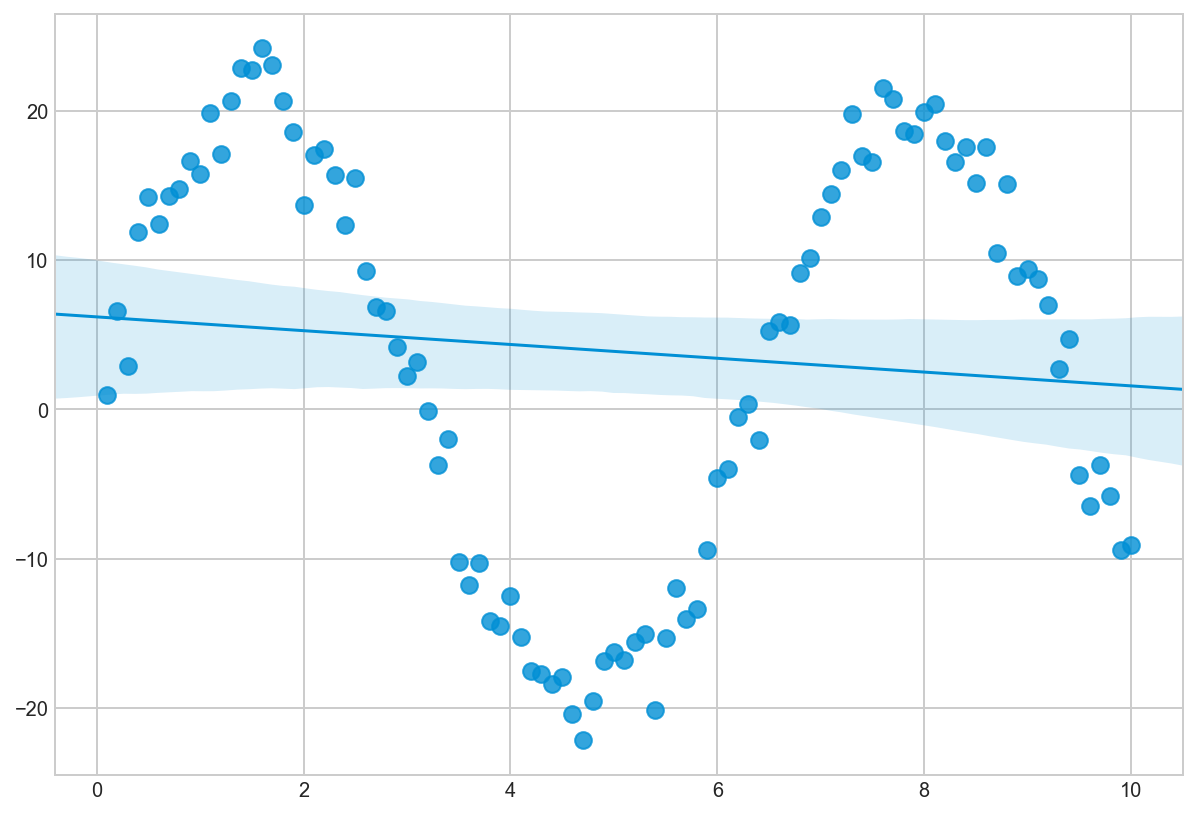

In [5]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysin'], scatter_kws={'s':70});

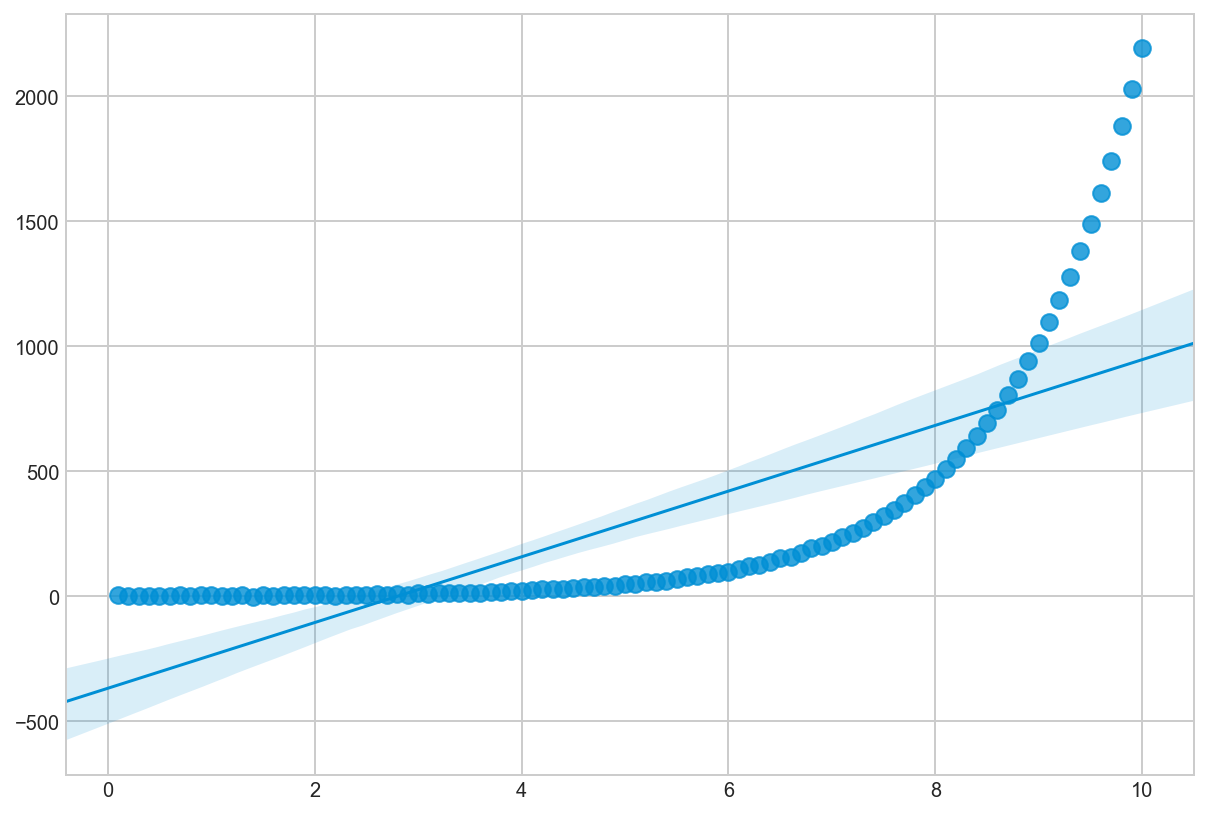

In [7]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['yexp'], scatter_kws={'s':70});

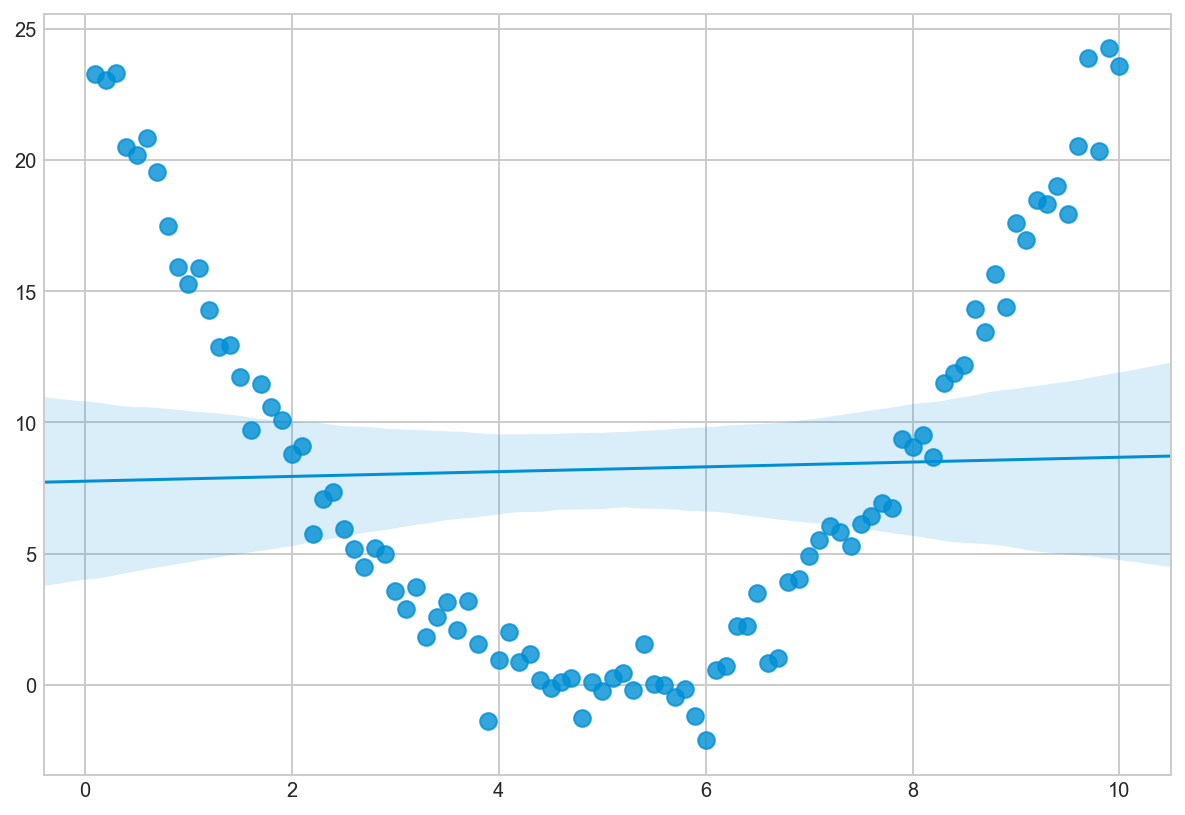

In [8]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysq'], scatter_kws={'s':70});

In [9]:
# This function builds trees for an x and y predictor and dependent variable from depth 1 to 10.
# (Regression trees)
# Tree predictions are put into a dictionary:
# 
def build_tree_models(x, y, tree_depth_range=range(1,11)):
    tree_model_ypreds = {}
    
    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])
        
    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:
#
def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys
    
    return trees_dict

tr = fit_trees(d)
    

In [10]:
# This function plots the x and y data as well as the decision tree decisions for the predicted y:
#
def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(9, 7))
        
    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]
    
    ax = sns.regplot(x=x, y=y_true, scatter_kws={'s':70}, fit_reg=False, x_ci=None, ci=None)
    
    ax.plot(x, y_pred, c="#D7B734", linewidth=5)
    
    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)
    
    plt.show()
    

# Widget inputs code:
#
def tree_plot_vars(function='ysq', treenum=1):
    tree_plotter(d, tr, function, treenum)
    

In [11]:
widgets.interact(tree_plot_vars,
                 function=['ysq','yexp','ysin','ygenlog'],
                 treenum=widgets.IntSlider(min=1, max=10, step=1, continuous_update=False, value=1))


interactive(children=(Dropdown(description='function', options=('ysq', 'yexp', 'ysin', 'ygenlog'), value='ysq'), IntSlider(value=1, continuous_update=False, description='treenum', max=10, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.tree_plot_vars(function='ysq', treenum=1)>

In [12]:
# Make a single regression tree model with depth 3 for x**2 function:
# 
x = d['x']
y = d['ysq']

dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(x[:, np.newaxis], y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

ModuleNotFoundError: No module named 'pydotplus'

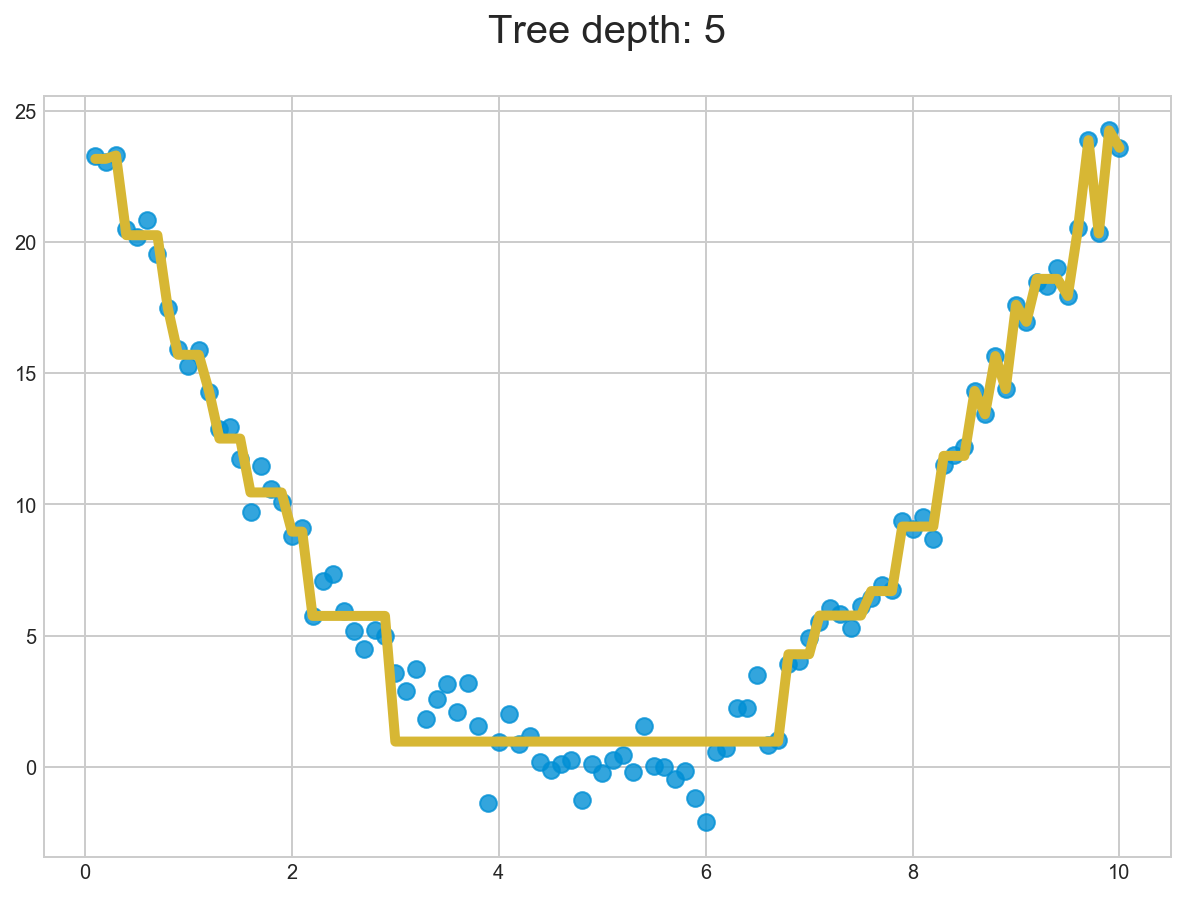

In [14]:
# Plot the decisions for y based on the decision tree DAG above
#
tree_plotter(d, tr, 'ysq', 5)